# Preprocessing and feature selection + Maps (at the end of the notebook)

In [158]:
import pandas as pd 

counties = pd.read_csv(r'..\_data\data_counties.csv')
municip = pd.read_csv(r'..\_data\data_municipalities.csv')

In [159]:
counties.isna().sum()

county_code                     0
county_name                     0
average_wage_relative           0
doctors_per_1000_persons        0
beds_in_hospitals               0
cars_per_1000_persons           0
motorcycles_per_1000_persons    0
education_share_higher          0
education_share_secondary       0
education_share_vocational      0
education_share_primary         0
tourits_per_1000_persons        1
dtype: int64

In [160]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
municip_merged = municip.merge(counties, on='county_code')

### Bins made more comprehensive

In [161]:
# The total population for each age group
municip_merged['population_below_25'] = municip_merged[['population_0_4_total', 'population_5_9_total', 'population_10_14_total', 'population_15_19_total', 'population_20_24_total']].sum(axis=1)
municip_merged['population_25_60'] = municip_merged[['population_25_29_total', 'population_30_34_total', 'population_35_39_total', 'population_40_44_total', 'population_45_49_total', 'population_50_54_total', 'population_55_59_total', 'population_60_64_total']].sum(axis=1)
municip_merged['population_over_60'] = municip_merged[['population_65_69_total', 'population_70_74_total', 'population_75_79_total', 'population_80_84_total']].sum(axis=1)

# Calculate total population
#municip_merged['population_total'] = municip_merged.iloc[:, 1:-3].sum(axis=1)

# Calculate percentages
municip_merged['percent_population_below_25'] = (municip_merged['population_below_25'] / municip_merged['population_total']) * 100
municip_merged['percent_population_25_60'] = (municip_merged['population_25_60'] / municip_merged['population_total']) * 100
municip_merged['percent_population_over_60'] = (municip_merged['population_over_60'] / municip_merged['population_total']) * 100

# Drop intermediate columns if needed
pops_to_drop = ['population_0_4_total', 'population_5_9_total', 'population_10_14_total', 'population_15_19_total', 'population_20_24_total',
'population_25_29_total', 'population_30_34_total', 'population_35_39_total', 'population_40_44_total', 'population_45_49_total',
'population_50_54_total', 'population_55_59_total', 'population_60_64_total', 'population_65_69_total', 'population_70_74_total', 'population_75_79_total', 'population_80_84_total']
municip_merged = municip_merged.drop(['population_below_25', 'population_25_60', 'population_over_60'], axis=1)
for pop_to_drop in pops_to_drop:
    municip_merged= municip_merged.drop([pop_to_drop, pop_to_drop+'_f', pop_to_drop+'_m'], axis=1)
municip_merged

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_watersupply,installations_toilet,installations_bathroom,installations_central_heating,installations_network_gas,appartment_area_per_person,appartments_per_1000_persons,persons_per_appartment,persons_per_room,persons_per_library,library_books_per_1000_persons,library_readers_per_1000_persons,library_loans_per_reader,forests_area,unemployed_total,unemployed_f,unemployed_m,unemployed_up_to_25,unemployed_over_50,unemployed_long_term,unemployment_rate,unemployment_rate_m,unemployment_rate_f,bicycle_paths_per_100km2,bicycle_paths_per_10k_persons,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,expenditures_per_capita,investment_expenditures_per_capita,children_3_5_in_kindergartens,net_scholarization,marriages_per_1000_persons,birthrate_per_1000_persons,net_migrations_per_1000_persons,persons_running_business,entities_registered_per_10k_persons,county_name,average_wage_relative,doctors_per_1000_persons,beds_in_hospitals,cars_per_1000_persons,motorcycles_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60
0,201011,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,98.5,98.0,97.5,87.1,90.6,28.7,444.9,2.25,0.64,18830,2959,143,11.3,75.18,761,409,352,70,187,275,3.6,3.1,4.1,157.40,9.85,5312.66,1067.74,56.58,4962.55,142.34,1117.0,113.11,3.2,-6.04,-5.3,3099,1323,bolesławiecki,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478
1,201022,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,97.8,97.2,95.3,83.2,28.8,36.3,305.9,3.27,0.64,2495,4849,119,12.2,230.52,286,149,137,52,72,105,3.1,2.8,3.5,3.95,7.62,5396.32,926.60,11.74,4859.22,895.71,581.0,68.29,3.2,-0.60,12.5,1431,1086,bolesławiecki,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717
2,201032,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,96.1,93.6,91.8,79.1,0.2,30.9,345.8,2.89,0.64,5156,2921,37,12.6,204.00,119,73,46,17,27,47,3.8,2.7,5.2,0.00,0.00,8219.43,690.41,162.36,6318.14,1196.25,662.0,89.37,2.1,-3.48,-1.4,257,673,bolesławiecki,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381
3,201043,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,96.8,95.9,94.4,77.3,14.2,28.0,305.5,3.27,0.69,2970,2939,48,8.3,251.00,342,192,150,57,82,135,3.7,3.0,4.6,0.00,0.00,5067.58,644.43,30.53,4972.40,379.00,615.0,84.88,4.1,-0.67,0.5,1070,871,bolesławiecki,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018
4,201052,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,96.0,95.7,93.9,71.6,4.1,30.8,397.0,2.52,0.62,1226,6674,167,7.8,43.13,175,93,82,23,41,74,3.8,3.3,4.5,0.00,0.00,6377.16,786.19,27.93,4837.36,282.14,762.0,100.15,4.8,-2.15,1.7,539,896,bolesławiecki,88.5,14.3,235,613.5,31.4,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,98.6,94.9,93.1,72.4,27.6,25.9,373.1,2.68,0.70,7470,4272,77,21.7,249.78,535,249,286,82,137,342,12.1,11.5,12.9,0.42,1.61,6000.71,878.57,33.35,6092.76,1068.83,784.0,81.63,3.1,-11.69,-1.5,562,1068,łobeski,85.3,7.8,0,691.4,75.0,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696
2473,3218053,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,97.4,92.7,89.8,72.2,3.7,26.6,371.2,2.69,0.71,2154,3068,141,19.8,275.

In [162]:
municip_merged.to_csv('..\_data\data_municipalies_merged.csv', index = False)

In [ ]:
# Columns deemed to detailed or irrelevant or representing already covered features
cols_to_drop = ['installations_watersupply','installations_toilet','installations_bathroom', 'installations_central_heating', 'installations_central_heating', 
               	'appartment_area_per_person', 'persons_per_appartment',	'persons_per_room', 'library_books_per_1000_persons', 'library_loans_per_reader',
                'unemployed_total',	'unemployed_f',	'unemployed_m'	,'unemployed_up_to_25',	'unemployed_over_50',	'unemployed_long_term',
                'bicycle_paths_per_100km2',	'bicycle_paths_per_10k_persons', 'expenditures_per_capita',	'investment_expenditures_per_capita',	'children_3_5_in_kindergartens',
                'marriages_per_1000_persons',	'birthrate_per_1000_persons',	'net_migrations_per_1000_persons',	'persons_running_business',	'entities_registered_per_10k_persons',
                'beds_in_hospitals',	'cars_per_1000_persons',	'motorcycles_per_1000_persons']

municip_merged.drop(cols_to_drop, axis=1, inplace=True)
municip_merged

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60
0,201011,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478
1,201022,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717
2,201032,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381
3,201043,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018
4,201052,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696
2473,3218053,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544
2474,3261011,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303
2475,3262011,Szczecin,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161


In [164]:
## Poglądy polityczne
opinie = pd.read_csv('..\_data\wyniki_gl_na_listy_po_gminach_proc_sejm.csv',sep=';')
opinie

,Kod TERYT,Gmina,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów z różnych list,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok nazwiska kandydata na liście której rejestracja została unieważniona,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20101,m. Bolesławiec,bolesławiecki,dolnośląskie,"60,88","1,15","46,19","53,81","0,00","98,85","23,95",NaN,"6,16","5,40",NaN,"35,83",NaN,"22,22","6,44",NaN
1,20102,gm. Bolesławiec,bolesławiecki,dolnośląskie,"56,54","1,47","58,06","41,94","0,00","98,53","19,24",NaN,"7,58","9,27",NaN,"43,64",NaN,"14,94","5,32",NaN
2,20103,gm. Gromadka,bolesławiecki,dolnośląskie,"52,83","2,42","81,82","18,18","0,00","97,58","12,93",NaN,"5,27","6,94",NaN,"50,81",NaN,"19,28","4,77",NaN
3,20104,gm. Nowogrodziec,bolesławiecki,dolnośląskie,"48,79","1,91","63,30","36,70","0,00","98,09","15,70",NaN,"7,73","9,60",NaN,"53,30",NaN,"9,75","3,92",NaN
4,20105,gm. Osiecznica,bolesławiecki,dolnośląskie,"49,94","2,49","65,67","34,33","0,00","97,51","19,38",NaN,"6,97","8,23",NaN,"45,70",NaN,"15,61","4,11",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,321804,gm. Resko,łobeski,zachodniopomorskie,"46,70","2,40","67,65","32,35","0,00","97,60","28,53",NaN,"5,29","11,01",NaN,"40,66",NaN,"14,52",NaN,NaN
2492,321805,gm. Węgorzyno,łobeski,zachodniopomorskie,"46,74","1,92","71,43","28,57","0,00","98,08","23,13",NaN,"5,75","12,82",NaN,"48,22",NaN,"10,07",NaN,NaN
2493,326101,m. Koszalin,Koszalin,zachodniopomorskie,"65,27","1,01","63,38","36,62","0,00","98,99","38,39",NaN,"5,96","7,75",NaN,"29,59",NaN,"18,32",NaN,NaN
2494,326201,m. Szczecin,Szczecin,zachodniopomorskie,"66,56","0,74","50,85","49,15","0,00","99,26","40,47",NaN,"6,79","4,64",NaN,"32,13",NaN,"15,97",NaN,NaN


In [165]:
opinie = opinie[['Kod TERYT', 'Frekwencja', '% głosów nieważnych', 'Województwo',
 'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19',
 'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19',
 'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19',
 'KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19',
 'KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19']]

opinie.columns = ['municipality_code', 'election_presence', 'percent_invalid_votes', 'voivodeship',
                   'PIS_party', 'KO_party', 'KONFEDERACJA_party', 'PSL_party', 'SLD_party']

In [166]:
import re
municip_merged['municipality_code_old'] = municip_merged['municipality_code']
municip_merged['municipality_code'] = municip_merged['municipality_code'].map(lambda x: int(str(x)[0:-1]))
municip_merged['municipality_code']

0        20101
1        20102
2        20103
3        20104
4        20105
         ...  
2472    321804
2473    321805
2474    326101
2475    326201
2476    326301
Name: municipality_code, Length: 2477, dtype: int64

In [167]:
municip_merged

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022
2,20103,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043
4,20105,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,321804,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043
2473,321805,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053
2474,326101,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011
2475,326201,Szczecin,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161,3262011


In [168]:
opinie.head()

,municipality_code,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party
0,20101,"60,88","1,15",dolnośląskie,"35,83","23,95","6,16","5,40","22,22"
1,20102,"56,54","1,47",dolnośląskie,"43,64","19,24","7,58","9,27","14,94"
2,20103,"52,83","2,42",dolnośląskie,"50,81","12,93","5,27","6,94","19,28"
3,20104,"48,79","1,91",dolnośląskie,"53,30","15,70","7,73","9,60","9,75"
4,20105,"49,94","2,49",dolnośląskie,"45,70","19,38","6,97","8,23","15,61"


In [169]:
municip_merged = municip_merged.merge(opinie, on='municipality_code', how='left')

In [170]:
municip_merged[municip_merged['PIS_party'].isna()]

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party
1280,146501,Warszawa,1465000,76.0,1861774,858762,1003012,517,3599.4,100.0,5698702.0,3093,71.7,555.1,7026,189,2924.56,2.2,2.2,2.1,9970.89,3302.09,545.73,99.51,m. st. Warszawa,129.4,48.9,47.35,32.26,8.24,7.78,710.8,23.654267,57.049889,16.437119,1465011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
wars = pd.read_csv(r'..\wars.csv', sep=';')

In [172]:
wars

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów z różnych list,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok nazwiska kandydata na liście której rejestracja została unieważniona,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,146501,Warszawa,mazowieckie,"77,07","0,53","45,59","54,41","0,00","99,47","42,96",NaN,"6,37","4,94",NaN,"28,26",NaN,"17,47",NaN,s


In [173]:
data_wars = [77.07, 0.53, 'mazowieckie', 28.26, 42.96, 6.37, 4.94, 17.47]

# Assuming the columns you want to assign to are in this order:
columns_to_assign = ['election_presence', 'percent_invalid_votes', 'voivodeship', 
                     'PIS_party', 'KO_party', 'KONFEDERACJA_party', 'PSL_party', 'SLD_party']

# Find the row index where municipality_code is 146501
row_index = municip_merged[municip_merged['municipality_code'] == 146501].index

# Assign values from data_wars to the specified columns
municip_merged.loc[row_index, columns_to_assign] = data_wars

In [174]:
municip_merged[municip_merged['municipality_code']==146501]

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party
1280,146501,Warszawa,1465000,76.0,1861774,858762,1003012,517,3599.4,100.0,5698702.0,3093,71.7,555.1,7026,189,2924.56,2.2,2.2,2.1,9970.89,3302.09,545.73,99.51,m. st. Warszawa,129.4,48.9,47.35,32.26,8.24,7.78,710.8,23.654267,57.049889,16.437119,1465011,77.07,0.53,mazowieckie,28.26,42.96,6.37,4.94,17.47


In [175]:
import numpy as np
municip_merged['percent_vaccinated_log'] = municip_merged['percent_vaccinated'].map(lambda x: np.log(x/100/(1-x/100)))

In [176]:
municip_merged

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011,"60,88","1,15",dolnośląskie,"35,83","23,95","6,16","5,40","22,22",0.277772
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022,"56,54","1,47",dolnośląskie,"43,64","19,24","7,58","9,27","14,94",-0.092065
2,20103,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032,"52,83","2,42",dolnośląskie,"50,81","12,93","5,27","6,94","19,28",-0.020001
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043,"48,79","1,91",dolnośląskie,"53,30","15,70","7,73","9,60","9,75",-0.100083
4,20105,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052,"49,94","2,49",dolnośląskie,"45,70","19,38","6,97","8,23","15,61",0.088057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,321804,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043,"46,70","2,40",zachodniopomorskie,"40,66","28,53","5,29","11,01","14,52",0.200671
2473,321805,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053,"46,74","1,92",zachodniopomorskie,"48,22","23,13","5,75","12,82","10,07",0.076037
2474,326101,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011,"65,27","1,01",zachodniopomorskie,"29,59","38,39","5,96","7,75","18,32",0.447312
2475,326201,Szczecin,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161,3262011,"66,56","0,74",zachodniopomorskie,"32,13","40,47","6,79","4,64","15,97",0.623438


In [66]:
municip_merged.to_csv('..\_data\data_municipality_final.csv', index=False)

In [67]:
pd.read_csv('..\_data\data_municipality_final.csv')

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011,"60,88","1,15",dolnośląskie,"35,83","23,95","6,16","5,40","22,22",0.277772
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022,"56,54","1,47",dolnośląskie,"43,64","19,24","7,58","9,27","14,94",-0.092065
2,20103,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032,"52,83","2,42",dolnośląskie,"50,81","12,93","5,27","6,94","19,28",-0.020001
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043,"48,79","1,91",dolnośląskie,"53,30","15,70","7,73","9,60","9,75",-0.100083
4,20105,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052,"49,94","2,49",dolnośląskie,"45,70","19,38","6,97","8,23","15,61",0.088057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,321804,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043,"46,70","2,40",zachodniopomorskie,"40,66","28,53","5,29","11,01","14,52",0.200671
2473,321805,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053,"46,74","1,92",zachodniopomorskie,"48,22","23,13","5,75","12,82","10,07",0.076037
2474,326101,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011,"65,27","1,01",zachodniopomorskie,"29,59","38,39","5,96","7,75","18,32",0.447312
2475,326201,Szczecin,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161,3262011,"66,56","0,74",zachodniopomorskie,"32,13","40,47","6,79","4,64","15,97",0.623438


## Missing values replaced with County/Vivodeship values (for Forests and for Tourists) and healthcare advices

In [117]:
municip_merged.isna().sum()

municipality_code                    0
municipality_name                    0
county_code                          0
percent_vaccinated                   0
population_total                     0
population_total_m                   0
population_total_f                   0
area_km2                             0
population_density                   0
urbanization_rate                    0
healthcare_advices                  59
population_per_pharmacy              0
installations_network_gas            0
appartments_per_1000_persons         0
persons_per_library                  0
library_readers_per_1000_persons     0
forests_area                        20
unemployment_rate                    0
unemployment_rate_m                  0
unemployment_rate_f                  0
revenues_per_capita                  0
revenues_per_capita_PIT              0
revenues_per_capita_CIT              0
net_scholarization                   0
county_name                          0
average_wage_relative    

In [177]:
import pandas as pd

# Get columns with missing values
columns_with_missing_values = municip_merged.columns[municip_merged.isnull().any()].tolist()

# Print the names of columns with missing values
print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)


# Group by 'county_code' and impute missing values in each group with the median
municip_merged[columns_with_missing_values] = municip_merged.groupby('county_code')[columns_with_missing_values].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
remaining_missing_values = municip_merged.isnull().sum().sum()
if remaining_missing_values == 0:
    print("All missing values have been imputed successfully.")
else:
    print(f"There are {remaining_missing_values} missing values remaining after imputation.")

Columns with missing values:
healthcare_advices
forests_area
tourits_per_1000_persons
There are 5 missing values remaining after imputation.


In [119]:
municip_merged.columns

Index(['municipality_code', 'municipality_name', 'county_code',
       'percent_vaccinated', 'population_total', 'population_total_m',
       'population_total_f', 'area_km2', 'population_density',
       'urbanization_rate', 'healthcare_advices', 'population_per_pharmacy',
       'installations_network_gas', 'appartments_per_1000_persons',
       'persons_per_library', 'library_readers_per_1000_persons',
       'forests_area', 'unemployment_rate', 'unemployment_rate_m',
       'unemployment_rate_f', 'revenues_per_capita', 'revenues_per_capita_PIT',
       'revenues_per_capita_CIT', 'net_scholarization', 'county_name',
       'average_wage_relative', 'doctors_per_1000_persons',
       'education_share_higher', 'education_share_secondary',
       'education_share_vocational', 'education_share_primary',
       'tourits_per_1000_persons', 'percent_population_below_25',
       'percent_population_25_60', 'percent_population_over_60',
       'municipality_code_old', 'election_presence', 'pe

In [178]:
import pandas as pd

# Get columns with missing values
columns_with_missing_values = municip_merged.columns[municip_merged.isnull().any()].tolist()

# Print the names of columns with missing values
print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)


# Group by 'county_code' and impute missing values in each group with the median
municip_merged[columns_with_missing_values] = municip_merged.groupby('voivodeship')[columns_with_missing_values].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
remaining_missing_values = municip_merged.isnull().sum().sum()
if remaining_missing_values == 0:
    print("All missing values have been imputed successfully.")
else:
    print(f"There are {remaining_missing_values} missing values remaining after imputation.")

Columns with missing values:
forests_area
tourits_per_1000_persons
All missing values have been imputed successfully.


In [80]:
municip_merged.to_csv(r'..\_data\data_municipalities_final.csv', index=False)

In [188]:
municip_merged.dtypes

county_code                           int64
percent_vaccinated                  float64
population_total                      int64
population_total_m                    int64
population_total_f                    int64
area_km2                              int64
population_density                  float64
urbanization_rate                   float64
healthcare_advices                  float64
population_per_pharmacy               int64
installations_network_gas           float64
appartments_per_1000_persons        float64
persons_per_library                   int64
library_readers_per_1000_persons      int64
forests_area                        float64
unemployment_rate                   float64
unemployment_rate_m                 float64
unemployment_rate_f                 float64
revenues_per_capita                 float64
revenues_per_capita_PIT             float64
revenues_per_capita_CIT             float64
net_scholarization                  float64
county_name                     

## Ensuring type of variables, adding data for Warsaw once again

In [179]:
# Assuming municip_merged is your DataFrame
columns_to_convert = ['appartments_per_1000_persons', 'election_presence', 'percent_invalid_votes', 'PIS_party', 'KO_party', 'KONFEDERACJA_party', 'PSL_party', 'SLD_party', 'percent_vaccinated_log']

for col in columns_to_convert:
    # Check if the column contains strings
    if municip_merged[col].dtype == 'object':
        # Replace spaces and commas with dots, then convert to float
        municip_merged[col] = municip_merged[col].str.replace(' ', '').str.replace(',', '.').astype(float)


In [180]:
data_wars = [77.07, 0.53, 'mazowieckie', 28.26, 42.96, 6.37, 4.94, 17.47]

# Assuming the columns you want to assign to are in this order:
columns_to_assign = ['election_presence', 'percent_invalid_votes', 'voivodeship', 
                     'PIS_party', 'KO_party', 'KONFEDERACJA_party', 'PSL_party', 'SLD_party']

# Find the row index where municipality_code is 146501
row_index = municip_merged[municip_merged['municipality_code'] == 146501].index

# Assign values from data_wars to the specified columns
municip_merged.loc[row_index, columns_to_assign] = data_wars

In [191]:
municip_merged.to_csv(r'..\_data\data_municipalities_final.csv', index=False)

In [187]:
municip_merged.isna().sum(
)

county_code                         0
percent_vaccinated                  0
population_total                    0
population_total_m                  0
population_total_f                  0
area_km2                            0
population_density                  0
urbanization_rate                   0
healthcare_advices                  0
population_per_pharmacy             0
installations_network_gas           0
appartments_per_1000_persons        0
persons_per_library                 0
library_readers_per_1000_persons    0
forests_area                        0
unemployment_rate                   0
unemployment_rate_m                 0
unemployment_rate_f                 0
revenues_per_capita                 0
revenues_per_capita_PIT             0
revenues_per_capita_CIT             0
net_scholarization                  0
county_name                         0
average_wage_relative               0
doctors_per_1000_persons            0
education_share_higher              0
education_sh

In [146]:
municip_merged

,municipality_code,municipality_name,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011,60.88,1.15,dolnośląskie,35.83,23.95,6.16,5.40,22.22,0.277772
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022,56.54,1.47,dolnośląskie,43.64,19.24,7.58,9.27,14.94,-0.092065
2,20103,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032,52.83,2.42,dolnośląskie,50.81,12.93,5.27,6.94,19.28,-0.020001
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043,48.79,1.91,dolnośląskie,53.30,15.70,7.73,9.60,9.75,-0.100083
4,20105,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052,49.94,2.49,dolnośląskie,45.70,19.38,6.97,8.23,15.61,0.088057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,321804,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043,46.70,2.40,zachodniopomorskie,40.66,28.53,5.29,11.01,14.52,0.200671
2473,321805,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053,46.74,1.92,zachodniopomorskie,48.22,23.13,5.75,12.82,10.07,0.076037
2474,326101,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011,65.27,1.01,zachodniopomorskie,29.59,38.39,5.96,7.75,18.32,0.447312
2475,326201,Szczecin,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161,3262011,66.56,0.74,zachodniopomorskie,32.13,40.47,6.79,4.64,15.97,0.623438


## Adding paritions - one-hot encoded

In [324]:
partitions = pd.read_csv(r'..\\_data\\spatial_data.csv')
municip_merged = municip_merged.merge(partitions,left_on='municipality_code_old', right_on='municipality_code')



In [183]:
municip_merged = pd.get_dummies(municip_merged, columns=['partition'])
municip_merged

,municipality_code_x,municipality_name_x,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log,municipality_code_y,municipality_name_y,splag_percent_vaccinated,partition_austrian,partition_prussian,partition_russian
0,20101,Bolesławiec,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011,60.88,1.15,dolnośląskie,35.83,23.95,6.16,5.40,22.22,0.277772,201011,Bolesławiec,47.700000,False,True,False
1,20102,Bolesławiec,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022,56.54,1.47,dolnośląskie,43.64,19.24,7.58,9.27,14.94,-0.092065,201022,Bolesławiec,53.300000,False,True,False
2,20103,Gromadka,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032,52.83,2.42,dolnośląskie,50.81,12.93,5.27,6.94,19.28,-0.020001,201032,Gromadka,50.083333,False,True,False
3,20104,Nowogrodziec,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043,48.79,1.91,dolnośląskie,53.30,15.70,7.73,9.60,9.75,-0.100083,201043,Nowogrodziec,50.550000,False,True,False
4,20105,Osiecznica,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052,49.94,2.49,dolnośląskie,45.70,19.38,6.97,8.23,15.61,0.088057,201052,Osiecznica,52.514286,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,321804,Resko,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043,46.70,2.40,zachodniopomorskie,40.66,28.53,5.29,11.01,14.52,0.200671,3218043,Resko,54.957143,False,True,False
2473,321805,Węgorzyno,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053,46.74,1.92,zachodniopomorskie,48.22,23.13,5.75,12.82,10.07,0.076037,3218053,Węgorzyno,57.700000,False,True,False
2474,326101,Koszalin,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011,65.27,1.01,zachodniopomorskie,29.59,38.39,5.96,7.75,18.32,0.447312,3261011,Koszalin,55.616667,False,True,False
2475,326201,Szczecin,3262000,65.1,397289,1884

In [184]:
municip_merged.isna().sum()

municipality_code_x                 0
municipality_name_x                 0
county_code                         0
percent_vaccinated                  0
population_total                    0
population_total_m                  0
population_total_f                  0
area_km2                            0
population_density                  0
urbanization_rate                   0
healthcare_advices                  0
population_per_pharmacy             0
installations_network_gas           0
appartments_per_1000_persons        0
persons_per_library                 0
library_readers_per_1000_persons    0
forests_area                        0
unemployment_rate                   0
unemployment_rate_m                 0
unemployment_rate_f                 0
revenues_per_capita                 0
revenues_per_capita_PIT             0
revenues_per_capita_CIT             0
net_scholarization                  0
county_name                         0
average_wage_relative               0
doctors_per_

In [185]:
municip_merged['municipality_code'] = municip_merged['municipality_code_x']
municip_merged['municipality_name'] = municip_merged['municipality_name_x']
municip_merged = municip_merged.drop(columns=['municipality_name_y','municipality_name_x','municipality_code_x','municipality_code_y'])

In [190]:
municip_merged=municip_merged.drop(columns=['splag_percent_vaccinated'])
municip_merged

,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,county_name,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,voivodeship,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log,partition_austrian,partition_prussian,partition_russian,municipality_code,municipality_name
0,201000,56.9,37659,17610,20049,24,1597.8,100.0,202393.0,2092,90.6,444.9,18830,143,75.18,3.6,3.1,4.1,5312.66,1067.74,56.58,113.11,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,21.349478,55.524576,20.563478,201011,60.88,1.15,dolnośląskie,35.83,23.95,6.16,5.40,22.22,0.277772,False,True,False,20101,Bolesławiec
1,201000,47.7,14967,7473,7494,289,51.9,0.0,13532.0,14967,28.8,305.9,2495,119,230.52,3.1,2.8,3.5,5396.32,926.60,11.74,68.29,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.001604,57.960847,12.901717,201022,56.54,1.47,dolnośląskie,43.64,19.24,7.58,9.27,14.94,-0.092065,False,True,False,20102,Bolesławiec
2,201000,49.5,5156,2559,2597,268,19.3,0.0,11221.0,5156,0.2,345.8,5156,37,204.00,3.8,2.7,5.2,8219.43,690.41,162.36,89.37,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,25.019395,56.923972,15.981381,201032,52.83,2.42,dolnośląskie,50.81,12.93,5.27,6.94,19.28,-0.020001,False,True,False,20103,Gromadka
3,201000,47.5,14852,7414,7438,176,84.2,28.1,47211.0,3713,14.2,305.5,2970,48,251.00,3.7,3.0,4.6,5067.58,644.43,30.53,84.88,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,27.699973,57.769997,12.941018,201043,48.79,1.91,dolnośląskie,53.30,15.70,7.73,9.60,9.75,-0.100083,False,True,False,20104,Nowogrodziec
4,201000,52.2,7358,3703,3655,437,16.8,0.0,38508.0,7358,4.1,397.0,1226,167,43.13,3.8,3.3,4.5,6377.16,786.19,27.93,100.15,bolesławiecki,88.5,14.3,17.43,35.08,25.51,15.85,427.36,28.146235,57.597173,12.666485,201052,49.94,2.49,dolnośląskie,45.70,19.38,6.97,8.23,15.61,0.088057,False,True,False,20105,Osiecznica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218000,55.0,7470,3744,3726,285,26.2,54.2,12945.0,3735,27.6,373.1,7470,77,249.78,12.1,11.5,12.9,6000.71,878.57,33.35,81.63,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,24.939759,55.876841,16.840696,3218043,46.70,2.40,zachodniopomorskie,40.66,28.53,5.29,11.01,14.52,0.200671,False,True,False,321804,Resko
2473,3218000,51.9,6463,3260,3203,256,25.2,41.2,12137.0,6463,3.7,371.2,2154,141,275.15,8.2,5.4,11.9,8185.84,537.42,20.72,71.07,łobeski,85.3,7.8,12.98,31.97,25.33,23.32,186.00,26.226211,55.423178,16.122544,3218053,46.74,1.92,zachodniopomorskie,48.22,23.13,5.75,12.82,10.07,0.076037,False,True,False,321805,Węgorzyno
2474,3261000,61.0,106152,50107,56045,98,1079.4,100.0,587171.0,2308,87.6,451.4,9650,131,123.16,5.2,4.9,5.5,6985.42,1561.14,96.76,105.84,m. Koszalin,90.0,39.5,29.82,36.16,16.67,11.44,0.00,21.740523,55.757781,19.907303,3261011,65.27,1.01,zachodniopomorskie,29.59,38.39,5.96,7.75,18.32,0.447312,False,True,False,326101,Koszalin
2475,3262000,65.1,397289,188454,208835,301,1321.7,100.0,1613617.0,2614,81.9,473.7,11036,126,2745.55,3.1,3.1,3.0,7659.20,1553.30,107.36,101.78,m. Szczecin,103.1,68.0,32.73,34.85,15.76,10.81,553.79,21.919812,56.716899,18.799161,3262011,66.56,0.74,zachodniopomorskie,32.13,40.47,6.79,4.64,15.97,0.623438,False,True,False,326201,Szczecin


## Maps

In [195]:
!pip install geopandas

In [318]:
import geopandas
# load the shapefile 
municip_merged = pd.read_csv(r"..\\_data\\data_municipalities_final.csv")
path=r"..\\_data\\shapefile\\map_municipalities.shp"
geo_county=geopandas.read_file(path)
geo_parition = geopandas.read_file(r"..\\_data\\shapefile\\map_partitions.shp")
# # rename columns
# geo_county.columns=['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'county', 'LSAD',
#        'ALAND', 'AWATER', 'geometry']
# #merge cb_2018_us_county_20m file with usa dta 
# geo_county=geo_county.merge(usa_county_df,on='county').dropna(axis=0).sort_values(by='Confirmed_Cases',ascending=False).reset_index()
# geo_county.head()

In [203]:
geo_county['mncplty_c'] = geo_county['mncplty_c'].astype(int)

In [325]:
geo_parition

,partition,geometry
0,austrian,"POLYGON ((19.44179 50.22659, 19.45253 50.22413..."
1,prussian,"POLYGON ((16.69817 54.56992, 16.76815 54.56989..."
2,russian,"POLYGON ((22.24718 50.63361, 22.23324 50.65139..."


In [322]:
spatial_data = pd.read_csv(r"..\\_data\\spatial_data.csv")

In [329]:
# municip_merged_geo = geo_county.merge(municip_merged,right_on='municipality_code_old', left_on='mncplty_c').sort_values(by='percent_vaccinated', ascending=False).reset_index()
# municip_merged_geo 

municip_merged_partition = geo_parition.merge(municip_merged, on='partition')


In [334]:
municip_merged_partition.groupby('partition').min('percent_vaccinated')

,county_code,percent_vaccinated,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,municipality_code_old,election_presence,percent_invalid_votes,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,percent_vaccinated_log,partition_austrian,partition_prussian,partition_russian,municipality_code_x,municipality_code_y,splag_percent_vaccinated
partition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
austrian,602000,25.6,1710,870,840,14,4.3,0.0,4473.0,0,0.0,220.7,469,18,0.07,1.4,1.0,1.6,4109.43,251.93,-51.24,54.43,73.3,5.1,14.13,28.64,11.82,7.99,0.0,19.960090,51.373586,8.711620,602042,41.68,0.55,18.31,1.99,3.06,3.37,1.54,-1.066864,True,False,False,60204,602042,29.783333
prussian,201000,30.9,1179,582,597,3,7.9,0.0,55.0,0,0.0,238.1,0,0,0.03,1.1,0.8,1.3,4329.49,298.95,-121.86,26.92,70.1,1.5,12.98,28.81,11.45,7.89,0.0,18.341588,50.186092,8.156575,201011,34.96,0.49,19.20,3.32,2.37,3.21,2.68,-0.804799,False,True,False,20101,201011,33.750000
russian,401000,32.0,1405,706,699,4,6.5,0.0,183.0,0,0.0,239.5,0,0,0.93,1.3,1.0,1.5,4302.95,242.20,-39.08,31.21,74.0,0.8,13.71,29.91,8.24,7.78,0.0,16.298932,44.889234,8.898861,401021,39.31,0.41,24.23,0.96,1.53,3.75,0.98,-0.753772,False,False,True,40102,401021,33.200000


NameError: name 'municip_merged_partition' is not defined

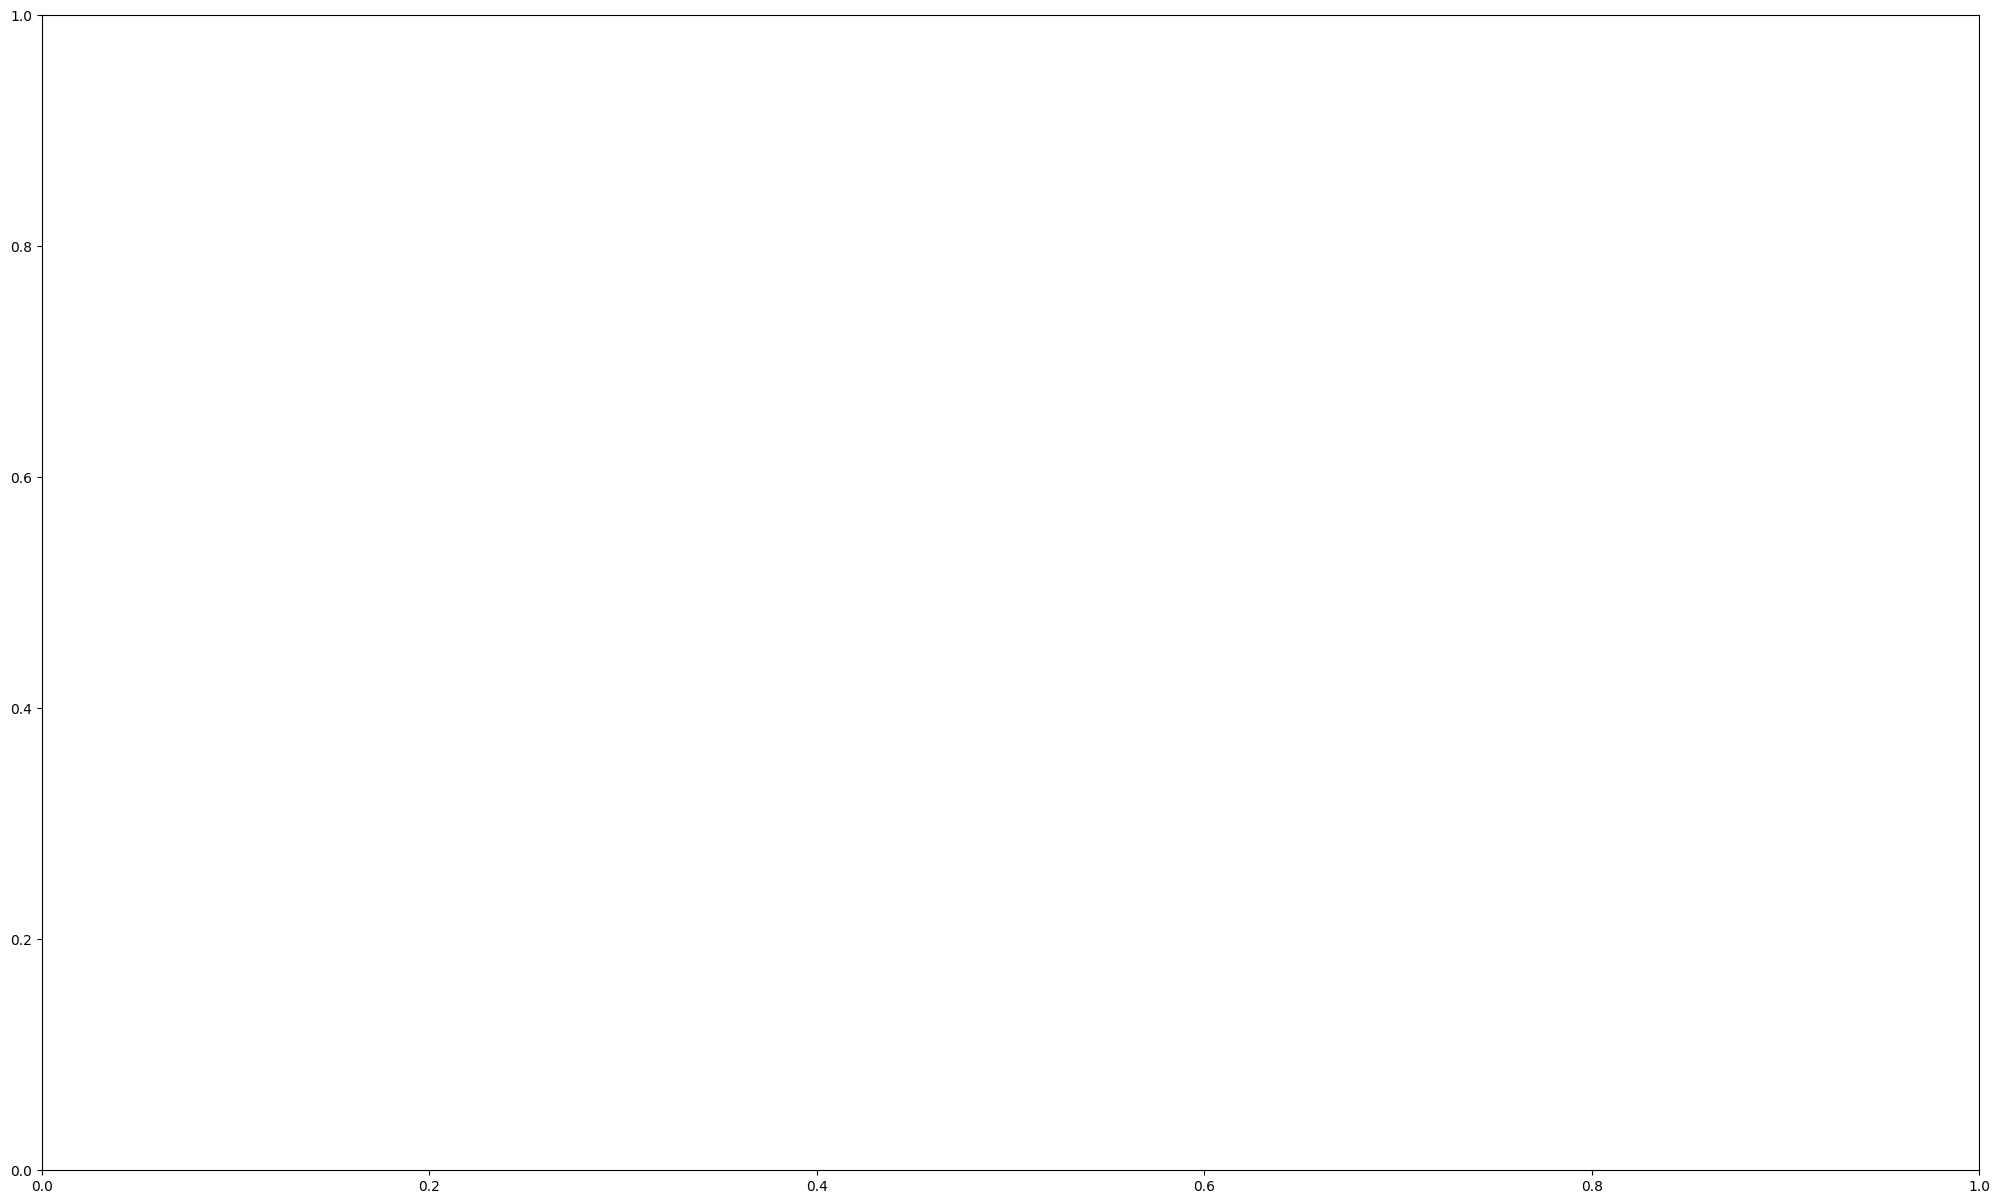

In [1]:
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(figsize=(25, 15))
municip_merged_partition.plot(column='percent_vaccinated', scheme="quantiles", ax=ax, cmap='coolwarm')

# Turn off x and y axes
ax.axis('off')

# Create colorbar without normalization
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='coolwarm'), ax=ax, shrink=0.3, aspect=10)
cbar.set_label('Percentage of Vaccinated', fontsize=16)  # Adjust the fontsize as needed

plt.show()


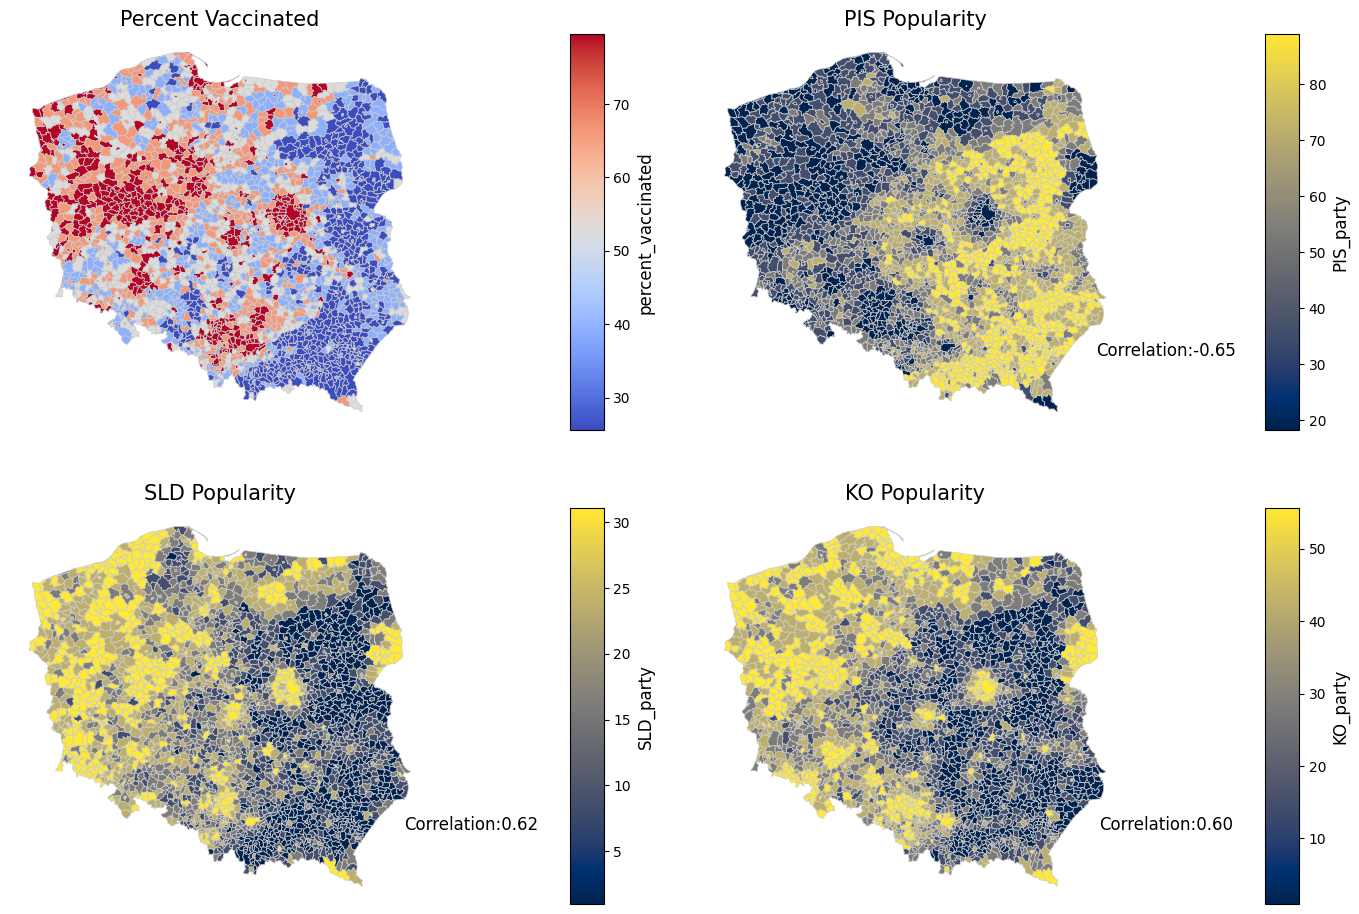

In [291]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Features to plot
features = ['percent_vaccinated','PIS_party', 'SLD_party', 'KO_party']
titles = ['Percent Vaccinated','PIS Popularity', 'SLD Popularity', 'KO Popularity']
# Colormaps for each subplot
colormaps = ['coolwarm', 'cividis', 'cividis', 'cividis']
# Correlation coefficients
correlation_coefficients = [0, -0.65, 0.62, 0.60]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over features and plot on each subplot with different colormap
for i, (feature, cmap, corr_coef) in enumerate(zip(features, colormaps, correlation_coefficients)):
    row = i // 2
    col = i % 2
    
    # Plot the map
    ax = axs[row, col]
    municip_merged_geo.plot(column=feature, scheme="quantiles", ax=ax, cmap=cmap, linewidth=0.5, edgecolor='0.8')
    
    # Turn off x and y axes
    ax.axis('off')
    
    # Set title
    ax.set_title(titles[i], fontsize=15)
    
    # Create colorbar
    norm = Normalize(vmin=municip_merged_geo[feature].min(), vmax=municip_merged_geo[feature].max())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, shrink=0.5)
    cbar.set_label(feature, fontsize=12)
    
    # Annotate correlation coefficient in the center of the subplot
    if feature != 'percent_vaccinated':
        ax.text(1.1, 0.2, f'Correlation:{corr_coef:.2f}', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='black')

plt.tight_layout()
plt.show()


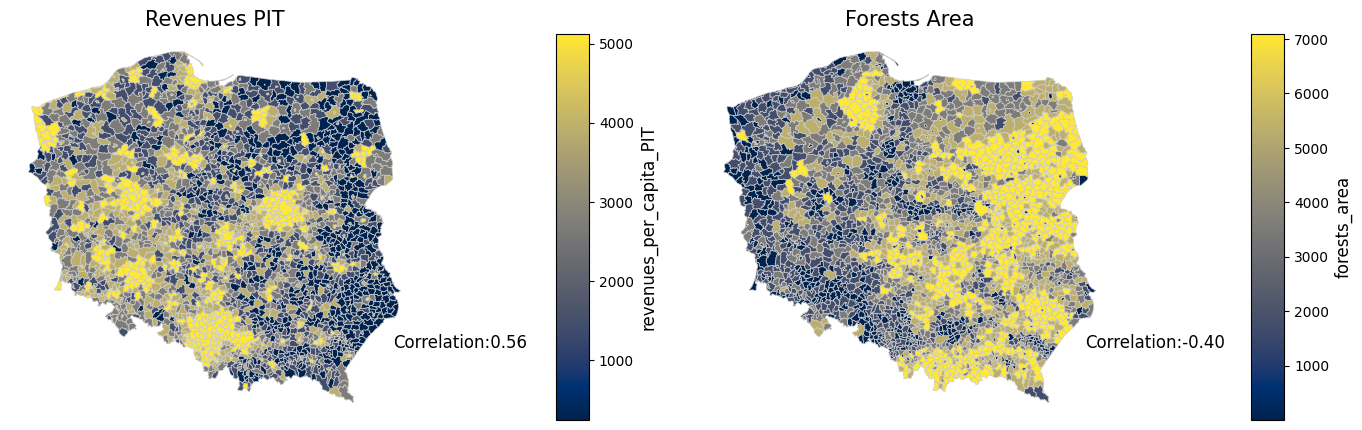

In [293]:
# Features to plot
features = ['revenues_per_capita_PIT', 'forests_area']
titles = ['Revenues PIT', 'Forests Area']
# Colormaps for each subplot
colormaps = ['cividis', 'cividis']
# Correlation coefficients
correlation_coefficients = [0.56, -0.40]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Iterate over features and plot on each subplot with different colormap
for i, (feature, cmap, corr_coef) in enumerate(zip(features, colormaps, correlation_coefficients)):
    row = 0
    col = i
    
    # Plot the map
    ax = axs[i]
    municip_merged_geo.plot(column=feature, scheme="quantiles", ax=ax, cmap=cmap, linewidth=0.5, edgecolor='0.8')
    
    # Turn off x and y axes
    ax.axis('off')
    
    # Set title
    ax.set_title(titles[i], fontsize=15)
    
    # Create colorbar
    norm = Normalize(vmin=municip_merged_geo[feature].min(), vmax=municip_merged_geo[feature].max())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, shrink=0.5)
    cbar.set_label(feature, fontsize=12)
    
      # Annotate correlation coefficient in the center of the subplot
    if feature != 'percent_vaccinated':
        ax.text(1.1, 0.2, f'Correlation:{corr_coef:.2f}', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='black')

plt.tight_layout()
plt.show()

In [300]:
# Filter numeric variables
numeric_vars = municip_merged_geo.select_dtypes(include='number')

# Calculate correlation coefficients between numeric features and target variable
correlation = numeric_vars.corr()['percent_vaccinated'].sort_values(ascending=False)

# Get features with absolute correlation greater than 30%
high_corr_features = correlation[abs(correlation) > 0.4].index.tolist()

# Display the list of features
print(high_corr_features)

['percent_vaccinated', 'percent_vaccinated_log', 'SLD_party', 'KO_party', 'revenues_per_capita_PIT', 'forests_area', 'PIS_party']


In [311]:
print(correlation)

percent_vaccinated                  1.000000
percent_vaccinated_log              0.999646
SLD_party                           0.621885
KO_party                            0.601258
revenues_per_capita_PIT             0.567301
urbanization_rate                   0.398975
appartments_per_1000_persons        0.369281
election_presence                   0.350064
population_density                  0.340984
education_share_higher              0.302994
persons_per_library                 0.290762
average_wage_relative               0.276711
revenues_per_capita_CIT             0.275165
healthcare_advices                  0.251796
net_scholarization                  0.249001
population_total_m                  0.217308
population_total                    0.215794
population_total_f                  0.214449
percent_population_over_60          0.208582
installations_network_gas           0.201195
percent_population_25_60            0.185220
library_readers_per_1000_persons    0.140154
county_cod

In [355]:
geo_county

,mncplty_c,mncplty_n,geometry
0,0201011,Bolesławiec,"POLYGON ((15.59173 51.26577, 15.60180 51.25575..."
1,0201022,Bolesławiec,"POLYGON ((15.60229 51.44818, 15.61762 51.46030..."
2,0201032,Gromadka,"POLYGON ((15.70369 51.51281, 15.71111 51.52350..."
3,0201043,Nowogrodziec,"POLYGON ((15.22980 51.18483, 15.20541 51.19206..."
4,0201052,Osiecznica,"POLYGON ((15.50791 51.51675, 15.59411 51.46789..."
...,...,...,...
2472,3218043,Resko,"POLYGON ((15.59266 53.76116, 15.62522 53.74986..."
2473,3218053,Węgorzyno,"POLYGON ((15.51259 53.59191, 15.53712 53.59557..."
2474,3261011,Koszalin,"POLYGON ((16.12893 54.23438, 16.13343 54.25184..."
2475,3262011,Szczecin,"POLYGON ((14.78674 53.35137, 14.80249 53.32728..."


In [310]:
vars = ['percent_vaccinated', 'PIS_party','SLD_party', 'KO_party', 'revenues_per_capita_PIT', 'forests_area']
numeric_vars[vars].describe().to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n & percent_vaccinated & PIS_party & SLD_party & KO_party & revenues_per_capita_PIT & forests_area \\\\\n\\midrule\ncount & 2477.000000 & 2477.000000 & 2477.000000 & 2477.000000 & 2477.000000 & 2477.000000 \\\\\nmean & 52.161849 & 53.552216 & 9.060880 & 18.177594 & 770.362802 & 757.348440 \\\\\nstd & 7.871822 & 13.873576 & 4.575986 & 10.388567 & 368.366685 & 884.593289 \\\\\nmin & 25.600000 & 18.310000 & 0.980000 & 0.960000 & 242.200000 & 0.030000 \\\\\n25% & 47.500000 & 42.530000 & 5.420000 & 9.050000 & 527.930000 & 142.000000 \\\\\n50% & 52.800000 & 53.250000 & 8.600000 & 17.080000 & 687.960000 & 423.970000 \\\\\n75% & 57.500000 & 65.010000 & 12.040000 & 25.930000 & 919.560000 & 1060.080000 \\\\\nmax & 79.500000 & 88.870000 & 31.060000 & 55.560000 & 5119.750000 & 7091.120000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [359]:
shap_df = pd.read_csv(r'..\\_data\\shap_df.csv')

shap_df = geo_county.join(shap_df.drop(columns=['mncplty_c', 'mncplty_n', 'geometry']))

In [360]:
shap_df

,mncplty_c,mncplty_n,geometry,Unnamed: 0,population_total,population_total_m,population_total_f,area_km2,population_density,urbanization_rate,healthcare_advices,population_per_pharmacy,installations_network_gas,appartments_per_1000_persons,persons_per_library,library_readers_per_1000_persons,forests_area,unemployment_rate,unemployment_rate_m,unemployment_rate_f,revenues_per_capita,revenues_per_capita_PIT,revenues_per_capita_CIT,net_scholarization,average_wage_relative,doctors_per_1000_persons,education_share_higher,education_share_secondary,education_share_vocational,education_share_primary,tourits_per_1000_persons,percent_population_below_25,percent_population_25_60,percent_population_over_60,election_presence,percent_invalid_votes,PIS_party,KO_party,KONFEDERACJA_party,PSL_party,SLD_party,partition_austrian,partition_prussian,partition_russian,spatial_lag_percent_vaccinated
0,0201011,Bolesławiec,"POLYGON ((15.59173 51.26577, 15.60180 51.25575...",0,-0.002920,-0.002932,-0.001792,0.001584,0.018005,0.098643,0.024528,0.005023,-0.025101,0.022860,0.001883,-0.000419,0.001449,-0.000784,0.000501,-0.000885,-0.001259,0.039668,0.006605,0.044240,0.000645,-0.000943,-0.003067,-0.003460,0.000580,-0.003704,0.001335,-0.006364,0.002670,0.039393,0.039687,-0.000132,0.021942,-0.000109,-0.001193,-0.021356,0.032782,-0.000978,3.219754e-06,0.000894,-0.065903
1,0201022,Bolesławiec,"POLYGON ((15.60229 51.44818, 15.61762 51.46030...",1,-0.003517,-0.001287,0.000246,-0.006222,-0.003591,-0.017051,-0.014558,-0.021666,0.002745,-0.006919,0.000940,-0.000462,-0.000973,-0.000937,0.000265,-0.001588,-0.001154,0.017404,-0.000676,-0.026872,0.000528,-0.000420,-0.000608,-0.003160,0.002448,-0.005138,0.000818,-0.000203,-0.025294,-0.024092,-0.001398,-0.001305,0.005015,-0.008336,-0.009417,0.001363,0.027541,-0.001334,9.080102e-07,0.000734,0.071356
2,0201032,Gromadka,"POLYGON ((15.70369 51.51281, 15.71111 51.52350...",2,-0.000884,-0.002772,0.003299,-0.004353,-0.003651,-0.020439,-0.011420,0.001560,0.002347,0.010923,0.002973,-0.008098,-0.000567,-0.000608,0.001351,-0.002061,0.002461,-0.012410,0.007759,-0.012146,0.000873,-0.000347,-0.003423,-0.003135,0.000187,-0.003747,0.001330,0.004983,-0.000126,0.006107,-0.005241,0.003441,0.008179,-0.005066,-0.006173,-0.013078,0.022786,-0.001389,3.924736e-06,0.002074,-0.027397
3,0201043,Nowogrodziec,"POLYGON ((15.22980 51.18483, 15.20541 51.19206...",3,-0.003274,-0.002075,0.000206,-0.002780,-0.002856,-0.020368,0.009230,-0.000680,0.002018,-0.008671,0.002340,-0.008921,0.000318,-0.000836,0.000282,-0.006256,-0.000691,-0.010163,0.004472,-0.010788,0.000768,-0.000861,-0.003681,-0.003861,0.000202,-0.004655,0.002568,0.002299,-0.024624,-0.024612,-0.035773,-0.000578,0.006713,-0.003782,-0.009227,0.004076,0.021029,-0.000990,2.030281e-07,0.000734,-0.020762
4,0201052,Osiecznica,"POLYGON ((15.50791 51.51675, 15.59411 51.46789...",4,-0.003454,-0.001193,0.000140,0.008892,-0.003521,-0.019568,0.002963,-0.009873,0.003164,0.021863,-0.004720,0.001088,0.005509,-0.000684,0.000118,-0.004452,0.002425,0.010564,0.005950,0.036881,0.000590,-0.000785,-0.002424,-0.003243,0.000956,-0.004890,0.001162,0.001372,-0.004179,-0.035883,-0.032879,0.014380,0.007630,-0.000859,-0.014159,-0.013378,0.037939,-0.001334,2.030281e-07,0.000734,-0.086348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,3218043,Resko,"POLYGON ((15.59266 53.76116, 15.62522 53.74986...",2472,-0.005197,-0.001194,0.000277,-0.006349,-0.002502,-0.013358,-0.011451,0.002777,0.000668,-0.022193,0.002021,0.002059,-0.002323,-0.000474,0.000395,0.000552,0.000442,-0.026183,0.000087,-0.009876,-0.001063,-0.001709,0.013702,0.003990,-0.000322,0.001412,0.000184,-0.007620,-0.002083,-0.061173,-0.017829,0.004373,0.012584,-0.001489,-0.002906,0.016170,0.022970,-0.002359,9.080102e-07,0.000705,0.142722
2473,3218053,Węgorzyno,"POLYGON ((15.51259 53.59191, 15.53712 53.59557...",2473,-0.002528,-0.002942,-0

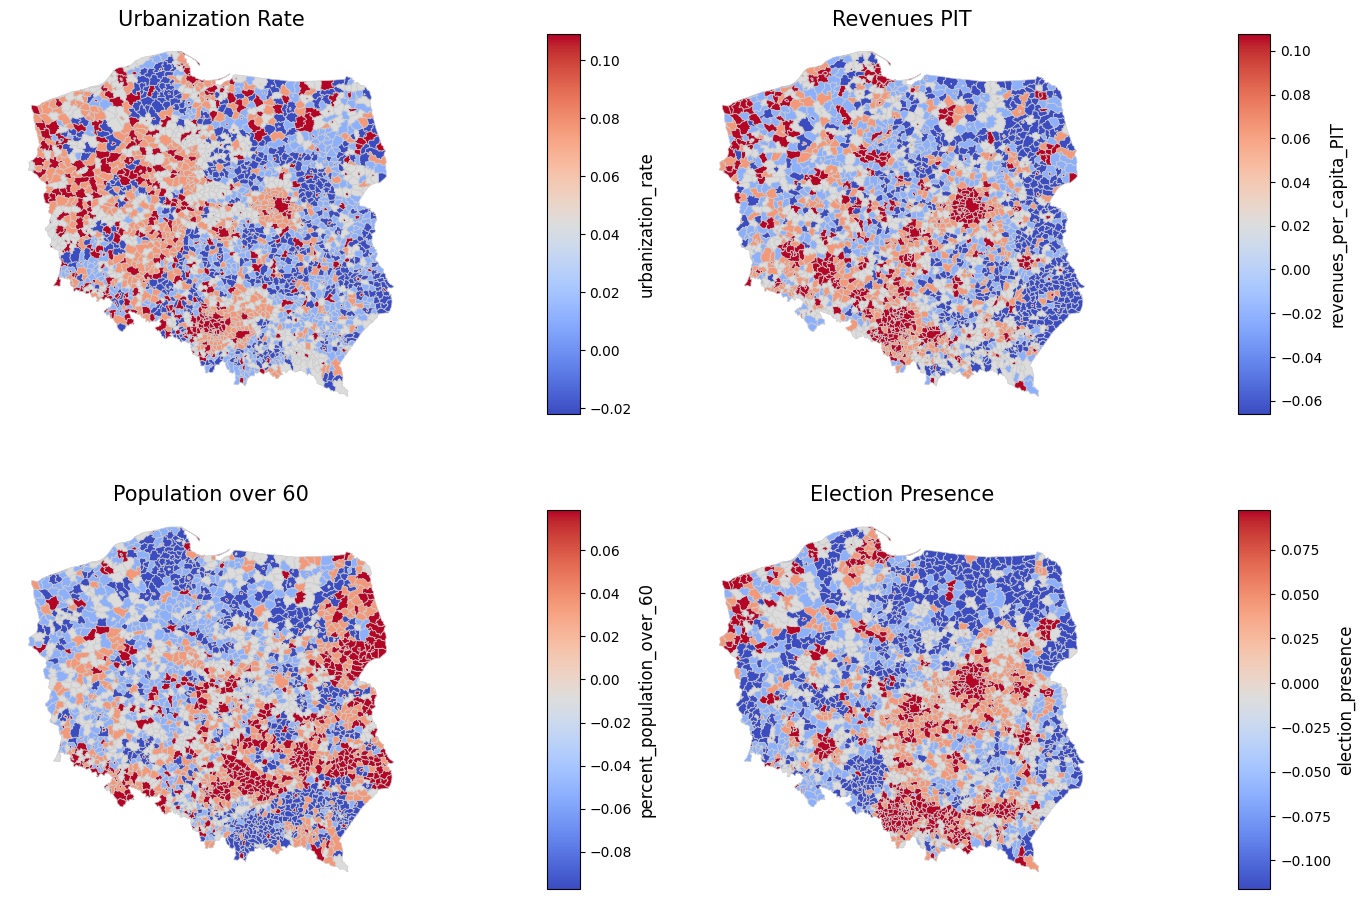

In [363]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Features to plot
features = ['urbanization_rate','revenues_per_capita_PIT', 'percent_population_over_60','election_presence']
titles = ['Urbanization Rate','Revenues PIT', 'Population over 60', 'Election Presence']
# Colormaps for each subplot
colormaps = ['coolwarm','coolwarm', 'coolwarm', 'coolwarm']
# Correlation coefficients
correlation_coefficients = [0, -0.65, 0.62, 0.60]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Iterate over features and plot on each subplot with different colormap
for i, (feature, cmap, corr_coef) in enumerate(zip(features, colormaps, correlation_coefficients)):
    row = i // 2
    col = i % 2
    
    # Plot the map
    ax = axs[row, col]
    shap_df.plot(column=feature, scheme="quantiles", ax=ax, cmap=cmap, linewidth=0.5, edgecolor='0.8')
    
    # Turn off x and y axes
    ax.axis('off')
    
    # Set title
    ax.set_title(titles[i], fontsize=15)
    
    # Create colorbar
    norm = Normalize(vmin=shap_df[feature].min(), vmax=shap_df[feature].max())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, shrink=0.5)
    cbar.set_label(feature, fontsize=12)
    
    # # Annotate correlation coefficient in the center of the subplot
    # if feature != 'percent_vaccinated':
    #     ax.text(1.1, 0.2, f'Correlation:{corr_coef:.2f}', fontsize=12, ha='center', va='center', transform=ax.transAxes, color='black')

plt.tight_layout()
plt.show()


In [353]:
# shap_df['latitude'][shap_df['voivodeship']=="dolnośląskie"] = 51.10
# shap_df['longtitude'][shap_df['voivodeship']=="dolnośląskie"] = 17.03
shap_df['latitude'] = 0
shap_df['longtitude'] = 0

In [343]:
municip_merged['voivodeship']

0             dolnośląskie
1             dolnośląskie
2             dolnośląskie
3             dolnośląskie
4             dolnośląskie
               ...        
2472    zachodniopomorskie
2473    zachodniopomorskie
2474    zachodniopomorskie
2475    zachodniopomorskie
2476    zachodniopomorskie
Name: voivodeship, Length: 2477, dtype: object